<a href="https://colab.research.google.com/github/Vyoma-garg/Deep_Learning/blob/main/8_Imbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
url='https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/11_chrun_prediction/customer_churn.csv'
df=pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID',axis = 'columns', inplace = True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
pd.to_numeric(df.TotalCharges)

ValueError: ignored

In [5]:
pd.to_numeric(df.TotalCharges, errors = 'coerce') #replace space with NULL

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [6]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()] #works as an index

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df.iloc[488] 
print(df.shape)
df1 = df[df.TotalCharges != ' ']
df1.shape

(7043, 20)


(7032, 20)

In [9]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
df1.TotalCharges.dtypes

dtype('float64')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


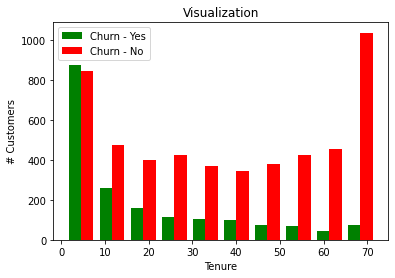

In [11]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure #Churn -> Not leaving company, Tenure -> Time for loyal customer
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure #Churn -> Not leaving company, Tenure -> Time for loyal customer
plt.xlabel('Tenure')
plt.ylabel('# Customers')
plt.title('Visualization')
plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green','red'], label = ['Churn - Yes', 'Churn - No'])
plt.legend()

In [12]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [13]:
df1.replace('No phone service','No', inplace = True)
df1.replace('No internet service','No', inplace = True)

print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [14]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes' : 1, 'No' : 0}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [15]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [16]:
df1['gender'].replace({'Female' : 1, 'Male':0}, inplace = True)
df1['gender'].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


array([1, 0])

In [17]:
#into one hot encoding for few columns with strigs
df2 = pd.get_dummies( data = df1, columns = ['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [18]:
#scaling for few columns with higher values
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [19]:
for cols in df2:
    print(f'{cols} : {df2[cols].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [20]:
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [22]:
X_train.shape, X_test.shape

((5625, 26), (1407, 26))

In [23]:
len(X_train.columns)

26

In [24]:
from sklearn.metrics import confusion_matrix , classification_report

def ANN(X_train, y_train, X_test, y_test, loss, weight):
  model = keras.Sequential([
                            keras.layers.Dense(20, input_shape = (26,), activation = 'relu'),
                            keras.layers.Dense(10, activation = 'relu'),
                            keras.layers.Dense(1, activation = 'sigmoid'),  #prediction
  ])

  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  
  if weight== -1:
    model.fit(X_train, y_train, epochs = 100)
  else:
    model.fit(X_train, y_train, epochs = 100, class_weight=weight)

  print(model.evaluate(X_test, y_test))

  y_pred= model.predict(X_test)
  y_pred= np.round(y_pred)

  print("Classification Report", classification_report(y_test, y_pred))
  return y_pred

In [25]:
y_pred= ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5008 - accuracy: 0.7561
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.7977
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8009
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8028
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8098
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8062
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8092
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8076
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8085
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4048 - accura

In [27]:
y_test.value_counts()   #imbalanced data

0    999
1    408
Name: Churn, dtype: int64

In [29]:
#class data

class_count0, class_count1= df1.Churn.value_counts()

#divide by class
df_class0= df2[df2['Churn']==0]
df_class1= df2[df2['Churn']==1]

In [30]:
df_class0.shape, df_class1.shape

((5163, 27), (1869, 27))

## 1. UNDERSAMPLING

In [34]:
df_under_class0= df_class0.sample(class_count1)   #random sampling 

df_under= pd.concat([df_under_class0,df_class1 ], axis=0)

print(df_under.shape)

print("Random Under-Sampling:")
print(df_under.Churn.value_counts())

(3738, 27)
Random Under-Sampling:
1    1869
0    1869
Name: Churn, dtype: int64


In [35]:
X = df_under.drop('Churn', axis = 'columns')
y = df_under['Churn']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5,stratify=y)

In [38]:
y_train.value_counts()   #equal number of samples both classes because of stratify argument

1    1495
0    1495
Name: Churn, dtype: int64

In [39]:
y_pred= ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6201 - accuracy: 0.6896
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.7522
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4938 - accuracy: 0.7639
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.7659
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7716
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.7696
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.7719
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7756
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.7749
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4719 - accuracy: 0.7729
Epoch 11/

## 2. Oversampling (duplication)

In [40]:
class_count0, class_count1

(5163, 1869)

In [43]:
df_over_class1= df_class1.sample(class_count0, replace=True)

In [45]:
df_over= pd.concat([df_over_class1, df_class0])
df_over.shape

(10326, 27)

In [46]:
X = df_over.drop('Churn', axis = 'columns')
y = df_over['Churn']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5, stratify=y)

In [49]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [48]:
y_pred= ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5932 - accuracy: 0.6985
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5017 - accuracy: 0.7585
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4914 - accuracy: 0.7610
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.7653
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4818 - accuracy: 0.7660
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7662
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4760 - accuracy: 0.7656
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7700
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7689
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4689 - accura

## 3. Oversampling SMOTE, sampling using K-Nearest Neighbours

In [51]:
X= df2.drop('Churn', axis='columns')
y= df2['Churn']

In [52]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [54]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(sampling_strategy= 'minority')
sx, sy= smote.fit_resample(X,y)

In [55]:
sy.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sx, sy, test_size = 0.2, random_state = 5, stratify=sy)

In [60]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [61]:
y_pred= ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5688 - accuracy: 0.7010
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7762
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.7764
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4607 - accuracy: 0.7782
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.7808
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.7817
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.7829
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.7855
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.7908
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4432 - accura

## 4. Ensemble 

In [62]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [63]:
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5, stratify = y)

In [65]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [66]:
df3 =  X_train.copy()
df3['Churn'] = y_train

In [67]:
df3_class0 = df3[df3.Churn == 0]
df3_class1 = df3[df3.Churn == 1]

In [68]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [69]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis = 'rows')
    
    X_train = df_train.drop('Churn', axis = 'columns')
    y_train = df_train.Churn

    return X_train, y_train

In [70]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6952 - accuracy: 0.5415
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.7247
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7425
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5147 - accuracy: 0.7508
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7525
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5033 - accuracy: 0.7548
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 0.7545
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 0.7542
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4944 - accuracy: 0.7599
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.7625
Epoch 11/

In [71]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5645
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5699 - accuracy: 0.7281
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5184 - accuracy: 0.7518
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.7579
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.7612
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.7615
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.7635
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4886 - accuracy: 0.7652
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7662
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.7619
Epoch 11/

In [72]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)
y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6113 - accuracy: 0.6744
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5177 - accuracy: 0.7594
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7704
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.7746
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7784
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.7769
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.7776
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.7818
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.7810
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7791
Epoch 11/

In [73]:
y_pred_final  = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones > 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [74]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1033
           1       0.52      0.77      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407

